In [1]:
import pandas as pd
import numpy as np

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../data/train.csv")
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
## Dropping id and Name column
data = data.drop(["id", "Name"], axis=1)
data.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
def return_value_counts(col):
    print("Count of unique values in " + col + " column are:\n", data[col].value_counts())

def return_null_values(col):
    print(str("Null values in " + col + " column are ="), data[col].isnull().sum())

In [5]:
## Gender column
return_null_values("Gender")

Null values in Gender column are = 0


In [6]:
return_value_counts("Gender")

Count of unique values in Gender column are:
 Gender
Male      77464
Female    63236
Name: count, dtype: int64


Since, we know there is no ordinal relationship in "Gender" column, therefore, instead of label encoding (0, 1), I am using one-hot encoding.

In [7]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the Gender column
gender_encoded = one_hot_encoder.fit_transform(data[['Gender']])
gender_encoded

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [8]:
## Create the dataframe with column names for Gender
df_encoded = pd.DataFrame(
    gender_encoded, columns=one_hot_encoder.get_feature_names_out(["Gender"])
)
df_encoded.head()

,Gender_Female,Gender_Male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [9]:
data = pd.concat([data, df_encoded], axis=1)
data.head(1)

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Female,Gender_Male
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,1.0,0.0


In [10]:
## dropping the Gender column
data = data.drop(["Gender"], axis=1)
data.head(1)

,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Female,Gender_Male
0,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,1.0,0.0


In [11]:
pd.cut(data["Age"], 5)

0           (43.2, 51.6]
1         (17.958, 26.4]
2           (26.4, 34.8]
3         (17.958, 26.4]
4           (26.4, 34.8]
               ...      
140695    (17.958, 26.4]
140696      (34.8, 43.2]
140697    (17.958, 26.4]
140698      (43.2, 51.6]
140699      (26.4, 34.8]
Name: Age, Length: 140700, dtype: category
Categories (5, interval[float64, right]): [(17.958, 26.4] < (26.4, 34.8] < (34.8, 43.2] < (43.2, 51.6] < (51.6, 60.0]]

Bins created - [(17.958, 26.4] < (26.4, 34.8] < (34.8, 43.2] < (43.2, 51.6] < (51.6, 60.0]]

In [12]:
## Age column
data["Age_Group"] = pd.cut(data["Age"], 5, labels=[0, 1, 2, 3, 4])
data.head()

,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Female,Gender_Male,Age_Group
0,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,1.0,0.0,3
1,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,0.0,1.0,0
2,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,0.0,1.0,1
3,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,0.0,1.0,0
4,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,0.0,1


In [13]:
## Dropping the age column
data = data.drop(["Age"], axis=1)

In [14]:
data.head(1)

,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Female,Gender_Male,Age_Group
0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,1.0,0.0,3


In [15]:
## City column
data["City"].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [17]:
data["City"].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

There are lot of wrong values. Many people have written their names. What we can do is that instead of deleting their rows, we can classify as 'Others'.

In [18]:
names_to_change = [
    "Vidhi",
    "Ayush",
    "Krishna",
    "Aishwarya",
    "Keshav",
    "Harsha",
    "Nalini",
    "Aditya",
    "Malyansh",
    "Raghavendra",
    "Saanvi",
    "M.Tech",
    "Bhavna",
    "Nandini",
    "M.Com",
    "Plata",
    "Atharv",
    "Pratyush",
    "City",
    "3.0",
    "MCA",
    "Mira",
    "Moreadhyay",
    "Morena",
    "Ishkarsh",
    "Kashk",
    "Mihir",
    "Vidya",
    "Anvi",
    "Krinda",
    "Ayansh",
    "Shrey",
    "Ivaan",
    "Vaanya",
    "Gaurav",
    "Harsh",
    "Reyansh",
    "Kashish",
    "Kibara",
    "Vaishnavi",
    "Chhavi",
    "Parth",
    "Mahi",
    "Tushar",
    "MSc",
    "No",
    "Rashi",
    "ME",
    "Researcher",
    "Kagan",
    "Armaan",
    "Ithal",
    "Nalyan",
    "Dhruv",
    "Galesabad",
    "Itheg",
    "Aaradhya",
    "Pooja",
    "Khushi",
    "Jhanvi",
    "Unirar",
]

In [ ]:
wrong_spelling = ["Less Delhi", "Less than 5 Kalyan", "Tolkata", "Molkata", "Khaziabad"]

In [20]:
def name_to_others(lst):
    for name in lst:
        data.loc[data["City"] == name, "City"] = "Others"

In [21]:
name_to_others(names_to_change)

In [23]:
for name in wrong_spelling:
    if name == "Less Delhi":
        data.loc[data["City"] == name, "City"] = "Delhi"
    elif name == "Less than 5 Kalyan":
        data.loc[data["City"] == name, "City"] = "Kalyan"
    elif name == "Tolkata" or name == "Molkata":
        data.loc[data["City"] == name, "City"] = "Kolkata"
    else:
        data.loc[data["City"] == name, "City"] = "Ghaziabad"

In [24]:
data["City"].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Others', 'Gurgaon'], dtype=object)

In [25]:
data["City"].value_counts()

City
Kalyan           6592
Patna            5924
Vasai-Virar      5765
Kolkata          5692
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3621
Delhi            3594
Bhopal           3475
Faridabad        3268
Nashik           3144
Others             90
Ishanabad           1
Gurgaon             1
Name: count, dtype: int64

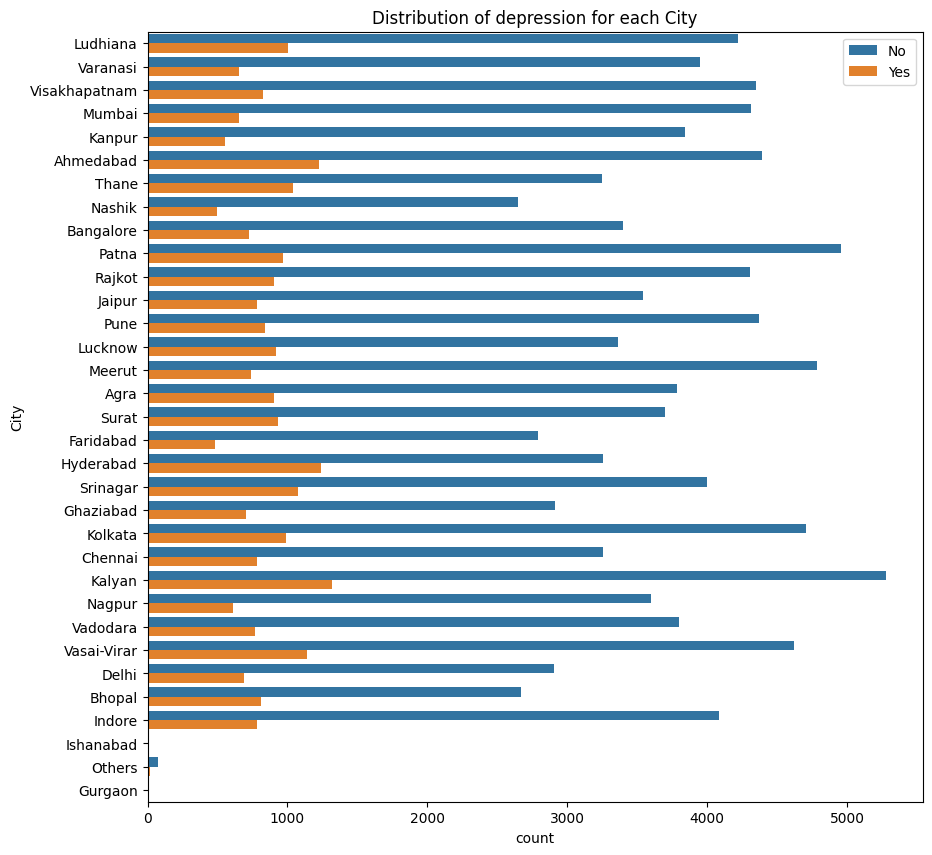

In [30]:
plt.figure(figsize=(10, 10))
sns.countplot(data, y="City", hue="Depression")
plt.title("Distribution of depression for each City")
plt.legend(["No", "Yes"])
plt.show()

In [31]:
## Percentage of Depressed in each city
depression_percentage = data.groupby("City")["Depression"].mean() * 100
print(depression_percentage.sort_values(ascending=False))

City
Ishanabad        100.000000
Hyderabad         27.513345
Thane             24.224761
Bhopal            23.251799
Ahmedabad         21.788705
Lucknow           21.401869
Srinagar          21.166732
Surat             20.189819
Kalyan            19.963592
Vasai-Virar       19.791847
Ghaziabad         19.524993
Chennai           19.436202
Ludhiana          19.269039
Agra              19.235696
Delhi             19.170840
Others            18.888889
Jaipur            18.137708
Bangalore         17.560029
Kolkata           17.357695
Rajkot            17.322835
Vadodara          16.768827
Patna             16.323430
Pune              16.103647
Indore            16.091954
Visakhapatnam     15.919629
Nashik            15.871501
Faridabad         14.687882
Nagpur            14.492754
Varanasi          14.220582
Meerut            13.404486
Mumbai            13.129279
Kanpur            12.573897
Gurgaon            0.000000
Name: Depression, dtype: float64


Ishanabad looks like an outlier. We should put that city into 'Others' as well.

In [33]:
data.loc[data["City"] == "Ishanabad", "City"] = "Others"

City
Hyderabad        27.513345
Thane            24.224761
Bhopal           23.251799
Ahmedabad        21.788705
Lucknow          21.401869
Srinagar         21.166732
Surat            20.189819
Kalyan           19.963592
Vasai-Virar      19.791847
Others           19.780220
Ghaziabad        19.524993
Chennai          19.436202
Ludhiana         19.269039
Agra             19.235696
Delhi            19.170840
Jaipur           18.137708
Bangalore        17.560029
Kolkata          17.357695
Rajkot           17.322835
Vadodara         16.768827
Patna            16.323430
Pune             16.103647
Indore           16.091954
Visakhapatnam    15.919629
Nashik           15.871501
Faridabad        14.687882
Nagpur           14.492754
Varanasi         14.220582
Meerut           13.404486
Mumbai           13.129279
Kanpur           12.573897
Gurgaon           0.000000
Name: Depression, dtype: float64


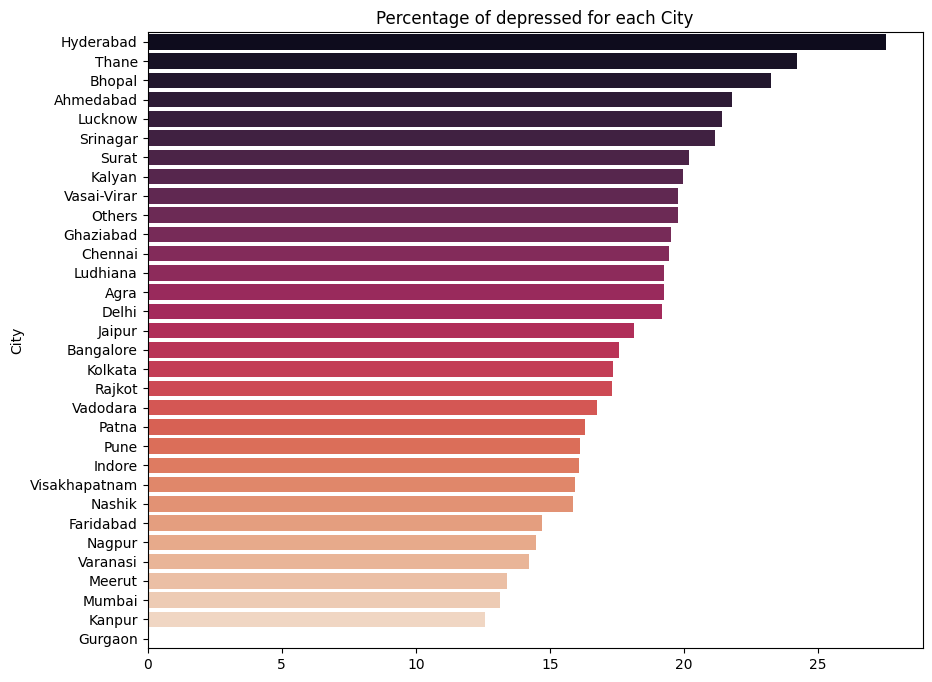

In [35]:
depression_percentage = data.groupby("City")["Depression"].mean() * 100
print(depression_percentage.sort_values(ascending=False))
depression_percentage_sorted = depression_percentage.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(
    y=depression_percentage_sorted.index,
    x=depression_percentage_sorted.values,
    palette="rocket",
)
plt.title("Percentage of depressed for each City")
plt.show()